In [ ]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(market_data_df)

In [ ]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=market_data_df.columns, index=market_data_df.index)

# Copy the crypto names from the original data
crypto_names = market_data_df.index.copy()

# Display sample data
print(market_data_scaled_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [16]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:

    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k,random_state=12)

    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(market_data_scaled_df)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = { 
    "k_values": k_values,
    "inertia_values": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

    k_values  inertia_values
0          1      287.000000
1          2      232.054230
2          3      165.136752
3          4      157.750386
4          5       72.039114
5          6       67.030488
6          7       54.810353
7          8       40.315144
8          9       34.743651
9         10       33.122477
10        11       30.726529


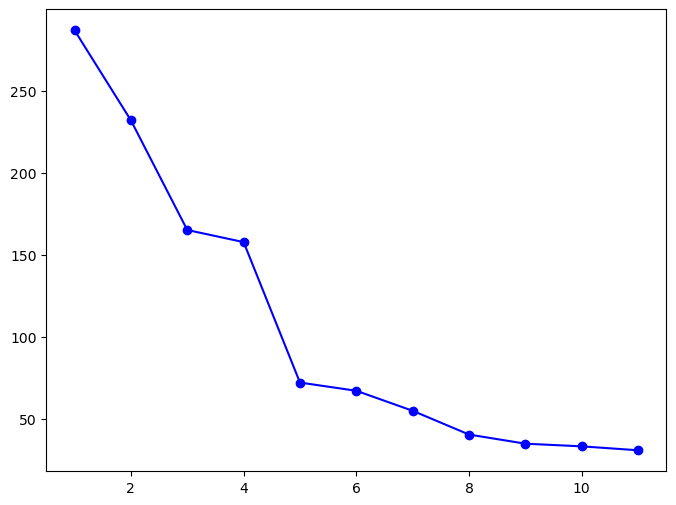

In [18]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(8, 6))
plt.plot(elbow_df["k_values"], elbow_df["inertia_values"], marker='o', color='b')

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

In [ ]:
The best value for k is 3

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [19]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3, random_state=12)

In [20]:
# Fit the K-Means model using the scaled data
kmeans.fit(market_data_scaled_df)

KMeans(n_clusters=3, random_state=12)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(market_data_scaled_df)

# View the resulting array of cluster values.
print(cluster_labels)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 2
 1 1 1 1]


In [22]:
# Create a copy of the DataFrame
market_data_scaled_df_copy = market_data_scaled_df.copy()

In [23]:
# Add a new column to the DataFrame with the predicted clusters
market_data_scaled_df_copy['Cluster'] = cluster_labels

# Display sample data
print(market_data_scaled_df_copy)

                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                  0.508529                    0.493193   
ethereum                                 0.185446                    0.934445   
tether                                   0.021774                   -0.706337   
ripple                                  -0.040764                   -0.810928   
bitcoin-cash                             1.193036                    2.000959   
binancecoin                              0.891871                    1.327295   
chainlink                                0.011397                    2.572251   
cardano                                  0.102530                    1.508001   
litecoin                                 0.077497                    0.334297   
bitcoin-cash-sv                          0.448952                   -0.190684   
crypto-com-chain            

In [27]:
print(market_data_scaled_df_copy.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'Cluster'],
      dtype='object')


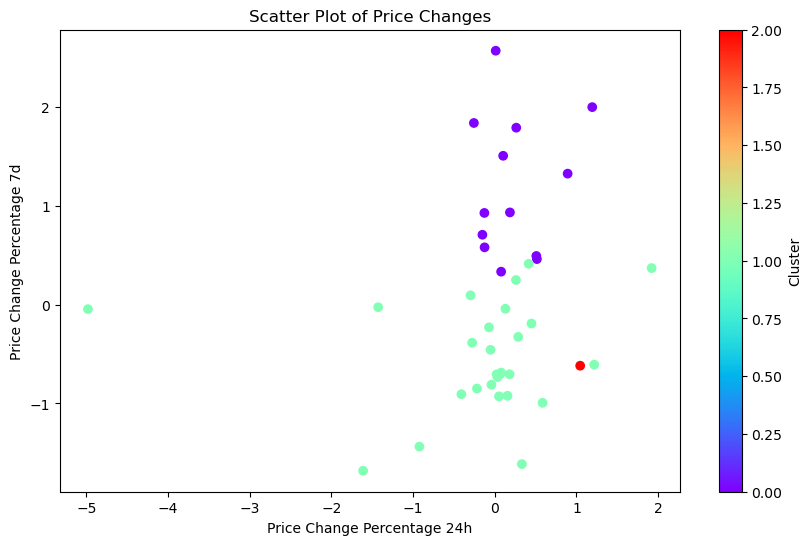

In [ ]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

if market_data_scaled_df_copy['Cluster'].dtype == 'object':
    market_data_scaled_df_copy['Cluster'] = market_data_scaled_df_copy['Cluster'].astype('category').cat.codes

plt.figure(figsize=(10, 6))
plt.scatter(
    x=market_data_scaled_df_copy['price_change_percentage_24h'],
    y=market_data_scaled_df_copy['price_change_percentage_7d'],
    c=market_data_scaled_df_copy['Cluster'],  
    cmap='rainbow'
)
plt.xlabel('Price Change Percentage 24h')
plt.ylabel('Price Change Percentage 7d')
plt.title('Scatter Plot of Price Changes')
plt.colorbar(label='Cluster')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [30]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [33]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_transformed_data = pca.fit_transform(market_data_scaled)

# View the first five rows of the DataFrame. 
print(pca_transformed_data[:5])

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [35]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [36]:
total_explained_variance = sum(explained_variance_ratio)
print(f"Total Explained Variance: {total_explained_variance:.4f}")

Total Explained Variance: 0.8950


In [38]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(
    pca_transformed_data,
    columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df['coinid'] = market_data_scaled_df.index

# Set the coinid column as index
pca_df.set_index('coinid', inplace=True)

# Display sample data
print(pca_df.head())

                   PC1       PC2       PC3
coinid                                    
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [39]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1,12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values: 
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=12)
   
    # 2. Fit the model to the data using PCA DataFrame.
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values, 
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

    k_values  inertia_values
0          1      256.874086
1          2      204.312055
2          3      142.769393
3          4       49.665497
4          5       39.094217
5          6       36.297962
6          7       24.833256
7          8       17.556701
8          9       14.554850
9         10       10.572380
10        11        9.357659


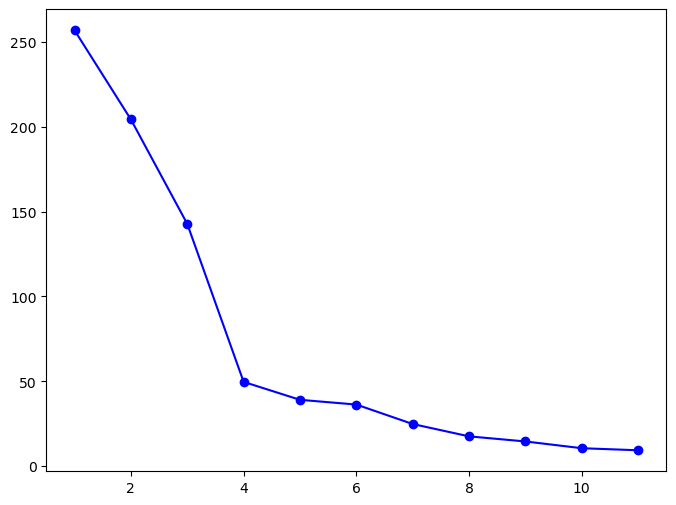

In [40]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o', color='b')

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes original data best value for K was 3 but with PCA Data it shifted to 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [41]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=12)

In [44]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=12)

In [45]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans.predict(pca_df)

# Print the resulting array of cluster values.
print("Cluster Labels:", cluster_labels)

Cluster Labels: [0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [47]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['Predicted Cluster'] = cluster_labels

# Display sample data
print(pca_df_copy.head())

                   PC1       PC2       PC3  Predicted Cluster
coinid                                                       
bitcoin      -0.600667  0.842760  0.461595                  0
ethereum     -0.458261  0.458466  0.952877                  0
tether       -0.433070 -0.168126 -0.641752                  1
ripple       -0.471835 -0.222660 -0.479053                  1
bitcoin-cash -1.157800  2.041209  1.859715                  0


In [51]:
print(pca_df_copy.columns)


Index(['PC1', 'PC2', 'PC3', 'Predicted Cluster'], dtype='object')


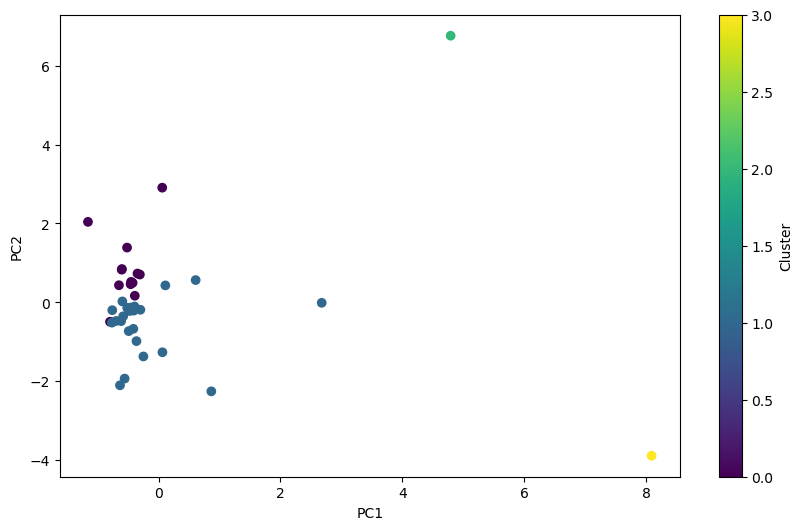

In [53]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. 
plt.figure(figsize=(10, 6))
plt.scatter(pca_df_copy['PC1'], pca_df_copy['PC2'], c=pca_df_copy['Predicted Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')

### Determine the Weights of Each Feature on each Principal Component

In [56]:
# Use the columns from the original scaled DataFrame as the index.
pca_df_copy.index = market_data_scaled_df_copy.index
print(pca_df_copy.head())

                   PC1       PC2       PC3  Predicted Cluster
coin_id                                                      
bitcoin      -0.600667  0.842760  0.461595                  0
ethereum     -0.458261  0.458466  0.952877                  0
tether       -0.433070 -0.168126 -0.641752                  1
ripple       -0.471835 -0.222660 -0.479053                  1
bitcoin-cash -1.157800  2.041209  1.859715                  0


In [60]:

features = market_data_scaled_df_copy.drop(columns=['Cluster'])

# Fit PCA
pca = PCA(n_components=3)  
pca.fit(features)


loadings = pd.DataFrame(pca.components_, columns=features.columns)

print("PCA Loadings:")
print(loadings)

# Identify the strongest influences for each component
for i, component in enumerate(loadings.iterrows()):
    print(f"\nComponent {i+1}:")
    sorted_loadings = component[1].sort_values(ascending=False,)
    print(sorted_loadings)

PCA Loadings:
   price_change_percentage_24h  price_change_percentage_7d  \
0                    -0.416728                   -0.102432   
1                     0.358162                    0.227432   
2                    -0.218795                    0.787670   

   price_change_percentage_14d  price_change_percentage_30d  \
0                    -0.009162                     0.191523   
1                     0.540415                     0.562182   
2                     0.349534                    -0.181744   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     0.320365                      0.594468   
1                     0.434040                      0.027735   
2                    -0.361377                      0.039733   

   price_change_percentage_1y  
0                    0.568379  
1                   -0.150789  
2                    0.210541  

Component 1:
price_change_percentage_200d    0.594468
price_change_percentage_1y      0.568379
pri

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

For Component 1, the feature with the strongest positive influence is price_change_percentage_200d, and the feature with the strongest negative influence is price_change_percentage_24h.

For Component 2, the feature with the strongest positive influence is price_change_percentage_30d, and the feature with the strongest negative influence is price_change_percentage_1y.

For Component 3, the feature with the strongest positive influence is price_change_percentage_7d, and the feature with the strongest negative influence is price_change_percentage_60d.